# Titanic Dataset: Survival Prediction using Python

### Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Read Data

In [20]:
df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

### Check the Data

In [21]:
df_train.head()
#df_train.info()
#df_train.describe()

#df_test.head()
#df_test.info()
#df_test.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Declaring Transformation Functions

In [22]:
def get_title(name):
    if '.' in name:
        title = name.split(', ')[1].split('. ')[0]
    else:
        title = 'Unknown'
        
    return title


#def map_title(title):
#    if title in ['Mr', 'Don', 'Rev', 'Dr', 'Major', 'Sir', 'Col', 'Capt']: return 0
#    elif title in ['Mrs', 'Lady', 'the Countess', 'Jonkheer']: return 1
#    elif title in ['Miss', 'Ms', 'Mme', 'Mlle']: return 2
#    elif title in ['Master']: return 3
#    else: return np.nan


#def map_sex(sex):
#    if sex == 'male': return 0
#    elif sex == 'female': return 1
#    else: return np.nan


#def map_embarked(embarked):
#    if embarked == 'S': return 0
#    elif embarked == 'C': return 1
#    elif embarked == 'Q': return 2
#    else: return np.nan
    


### Extracting New Features

In [23]:
# Extracting Title from Name

df_train['Title'] = df_train.Name.apply(get_title)
#df_test['Title'] = df_test.Name.apply(get_title)

### Cleaning Missing Data

In [24]:
#sum(np.isnan(df_train.Pclass))
#sum(np.isnan(df_train.Age))
#sum(np.isnan(df_train.SibSp))
#sum(np.isnan(df_train.Parch))
#sum(np.isnan(df_train.Fare))
#sum(pd.isnull(df_train.Embarked))
#sum(pd.isnull(df_train.Sex))
#sum(pd.isnull(df_train.Title))

# Only Age and Embarked have missing values

In [25]:
# For Embarked we will fillna with most common Embarked point - S

print(df_train.Embarked.value_counts())
df_train.Embarked.fillna('S', inplace=True)

#print(df_test.Embarked.value_counts())
#df_test.Embarked.fillna('S', inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [26]:
## For Age we will fill with the average age of the age group based on Title
#
#df_group_by_title = pd.DataFrame(df_train.groupby('Title').mean())
#
#
## For each row/index in DataFrame, if Age is NAN, replace with average age of corresponding Title 
## (lookup on df_group_by_title)
#
#for index, row in df_train.iterrows():
#    if np.isnan(df_train.Age[index]):
#        t = df_train.Title[index]
#        df_train.Age[index] = df_group_by_title.loc[t].Age
#        
#for index, row in df_test.iterrows():
#    if np.isnan(df_test.Age[index]):
#        t = df_test.Title[index]
#        df_test.Age[index] = df_group_by_title.loc[t].Age        


# For Age we will drop all rows containing NA values

df_train.Age.dropna(inplace=True)
#df_test.Age.dropna(inplace=True)


### Modifying Data

In [27]:
## Applying Transformations

#df_train['Title_n'] = df_train.Title.apply(map_title)
#df_train['Sex_n'] = df_train.Sex.apply(map_sex)
#df_train['Embark_n'] = df_train.Embarked.apply(map_embarked)


#df_test['Title_n'] = df_test.Title.apply(map_title)
#df_test['Sex_n'] = df_test.Sex.apply(map_sex)
#df_test['Embark_n'] = df_test.Embarked.apply(map_embarked)


df_train.head()
#df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### EDA

#### Single Column Data

Text(0.5,1,'Distribution of Fare')

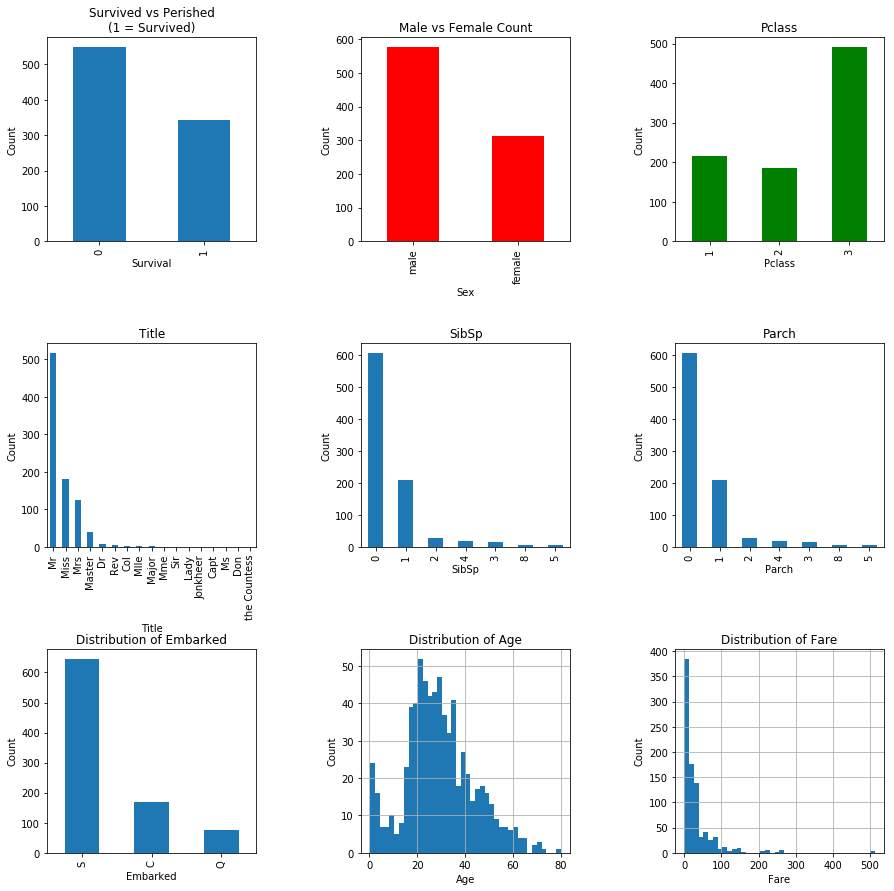

In [28]:
plt.figure(1, figsize= (15,15))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


# Survived vs Perished
plt.subplot(331)
df_train.Survived.value_counts().plot(kind='bar')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survived vs Perished\n(1 = Survived)')


# Male vs Female Count
plt.subplot(332)
df_train.Sex.value_counts().plot(kind='bar', color = 'r')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Male vs Female Count')


# Pclass
plt.subplot(333)
df_train.Pclass.value_counts().sort_index().plot(kind='bar', color = 'g')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass')


# Title
plt.subplot(334)
df_train.Title.value_counts().plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Title')


# SibSp
plt.subplot(335)
df_train.SibSp.value_counts().plot(kind='bar')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('SibSp')


# Parch
plt.subplot(336)
df_train.SibSp.value_counts().plot(kind='bar')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parch')



# Embarked
plt.subplot(337)
df_train.Embarked.value_counts().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Distribution of Embarked')


# Age
plt.subplot(338)
df_train.Age.hist(bins= 40)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')


# Fare
plt.subplot(339)
df_train.Fare.hist(bins= 40)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Distribution of Fare')

#### Survival ~ Other Columns

(0, 600)

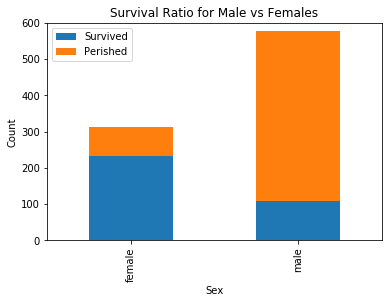

In [29]:
# Survival ~ Sex

df1 = pd.DataFrame(df_train.Sex[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Sex[df_train.Survived == 0].value_counts())
df1.rename(columns={'Sex':'Survived'}, inplace=True)
df2.rename(columns={'Sex':'Perished'}, inplace=True)
df3 = df1.join(df2)

df3.plot.bar(stacked = True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Ratio for Male vs Females')
plt.legend()
plt.ylim(0, 600)

(0, 700)

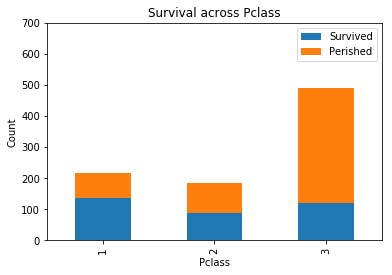

In [30]:
# Survival ~ Pclass

df1 = pd.DataFrame(df_train.Pclass[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Pclass[df_train.Survived == 0].value_counts())
df1.rename(columns={'Pclass':'Survived'}, inplace=True)
df2.rename(columns={'Pclass':'Perished'}, inplace=True)
df_join = df1.join(df2)

df_join.sort_index().plot.bar(stacked = True)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival across Pclass')
plt.legend()
plt.ylim(0, 700)

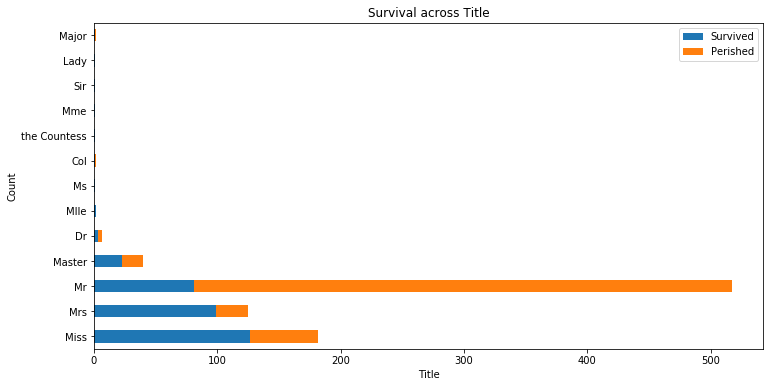

In [31]:
# Survival ~ Title

df1 = pd.DataFrame(df_train.Title[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Title[df_train.Survived == 0].value_counts())
df1.rename(columns={'Title':'Survived'}, inplace=True)
df2.rename(columns={'Title':'Perished'}, inplace=True)
df_join = df1.join(df2)

df_join.plot.barh(stacked = True, figsize=(12,6))
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Survival across Title')
plt.legend()

(0, 650)

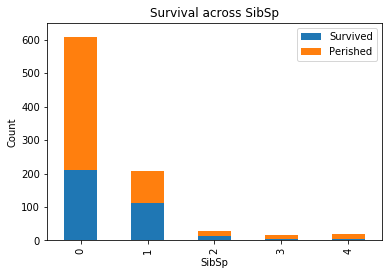

In [32]:
# Survival ~ SibSp

df1 = pd.DataFrame(df_train.SibSp[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.SibSp[df_train.Survived == 0].value_counts())
df1.rename(columns={'SibSp':'Survived'}, inplace=True)
df2.rename(columns={'SibSp':'Perished'}, inplace=True)
df_join = df1.join(df2)

df_join.plot.bar(stacked = True)
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Survival across SibSp')
plt.legend()
plt.ylim(0, 650)

(0, 700)

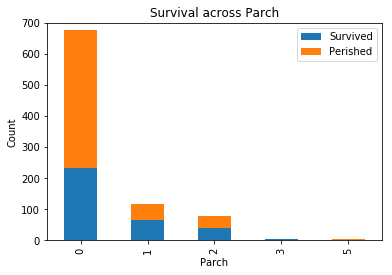

In [33]:
# Survival ~ Parch

df1 = pd.DataFrame(df_train.Parch[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Parch[df_train.Survived == 0].value_counts())
df1.rename(columns={'Parch':'Survived'}, inplace=True)
df2.rename(columns={'Parch':'Perished'}, inplace=True)
df_join = df1.join(df2)

df_join.plot.bar(stacked = True)
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Survival across Parch')
plt.legend()
plt.ylim(0, 700)

(0, 700)

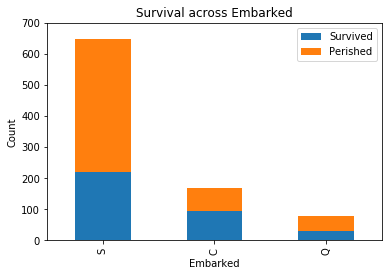

In [34]:
# Survival ~ Embarked

df1 = pd.DataFrame(df_train.Embarked[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Embarked[df_train.Survived == 0].value_counts())
df1.rename(columns={'Embarked':'Survived'}, inplace=True)
df2.rename(columns={'Embarked':'Perished'}, inplace=True)
df_join = df1.join(df2)

df_join.plot.bar(stacked = True)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival across Embarked')
plt.legend()
plt.ylim(0, 700)

(0, 20)

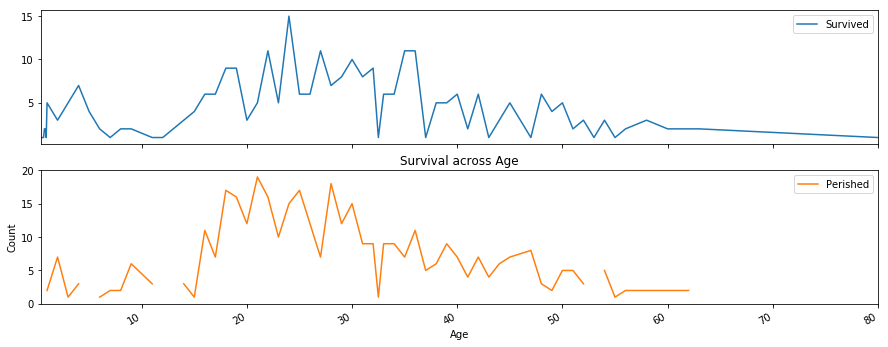

In [35]:
# Survival ~ Age

df1 = pd.DataFrame(df_train.Age[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Age[df_train.Survived == 0].value_counts())
df1.rename(columns={'Age':'Survived'}, inplace=True)
df2.rename(columns={'Age':'Perished'}, inplace=True)
df_join = df1.join(df2)

df_join.sort_index().plot.line(subplots=True, figsize=(15,6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival across Age')
plt.legend()
plt.ylim(0, 20)

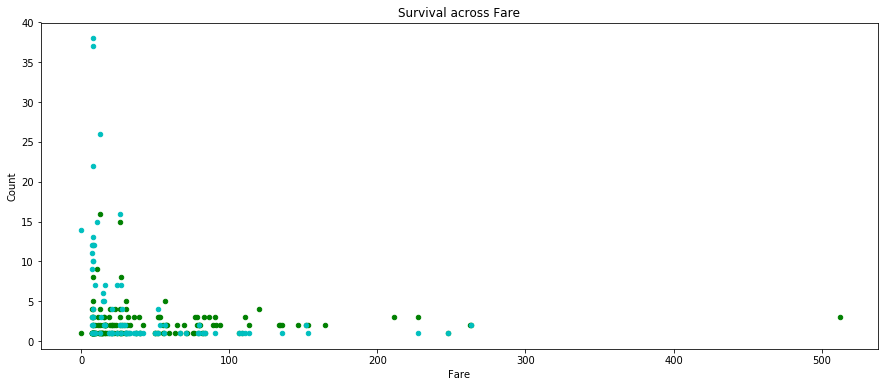

In [36]:
# Survival ~ Fare

df1 = pd.DataFrame(df_train.Fare[df_train.Survived == 1].value_counts())
df2 = pd.DataFrame(df_train.Fare[df_train.Survived == 0].value_counts())
df1.rename(columns={'Fare':'Survived'}, inplace=True)
df2.rename(columns={'Fare':'Perished'}, inplace=True)
df_join = df1.join(df2)

ax1 = df_join.sort_index().reset_index().plot.scatter(x='index', y=['Survived'], color = 'g',figsize=(15,6))
df_join.sort_index().reset_index().plot.scatter(x='index', y=['Perished'], color = 'c', ax = ax1)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Survival across Fare')
plt.legend()